In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor


In [126]:
url = 'https://raw.githubusercontent.com/paulrkzhao/NBAoctnov/main/fas_2024.csv'

df = pd.read_csv(url)

df.head()


,Name,three_pct_season,lwr_paint_pct_oct_nov,upr_paint_pct_oct_nov,mid_pct_oct_nov,three_non_cnr_pct_oct_nov,three_cnr_pct_oct_nov,ft_pct_oct_nov,lwr_paint_shots_oct_nov,upr_paint_shots_oct_nov,mid_shots_oct_nov,three_non_cnr_shots_oct_nov,three_cnr_shots_oct_nov,ft_shots_oct_nov
0,Malcolm Brogdon,0.437,0.484,0.619,0.600,0.444,0.485,0.863,62,21,10,27,33,51
1,Tyrese Maxey,0.435,0.505,0.452,0.458,0.512,0.361,0.738,105,42,24,41,61,65
2,Stephen Curry,0.432,0.706,0.526,0.467,0.415,0.466,0.907,109,38,30,82,148,107
3,Kentavious Caldwell-Pope,0.422,0.484,0.250,0.448,0.512,0.476,0.767,31,16,29,43,42,30
4,Jevon Carter,0.421,0.483,0.375,0.500,0.321,0.480,0.846,29,16,32,28,50,13


<ipython-input-127-03754b4e12c1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


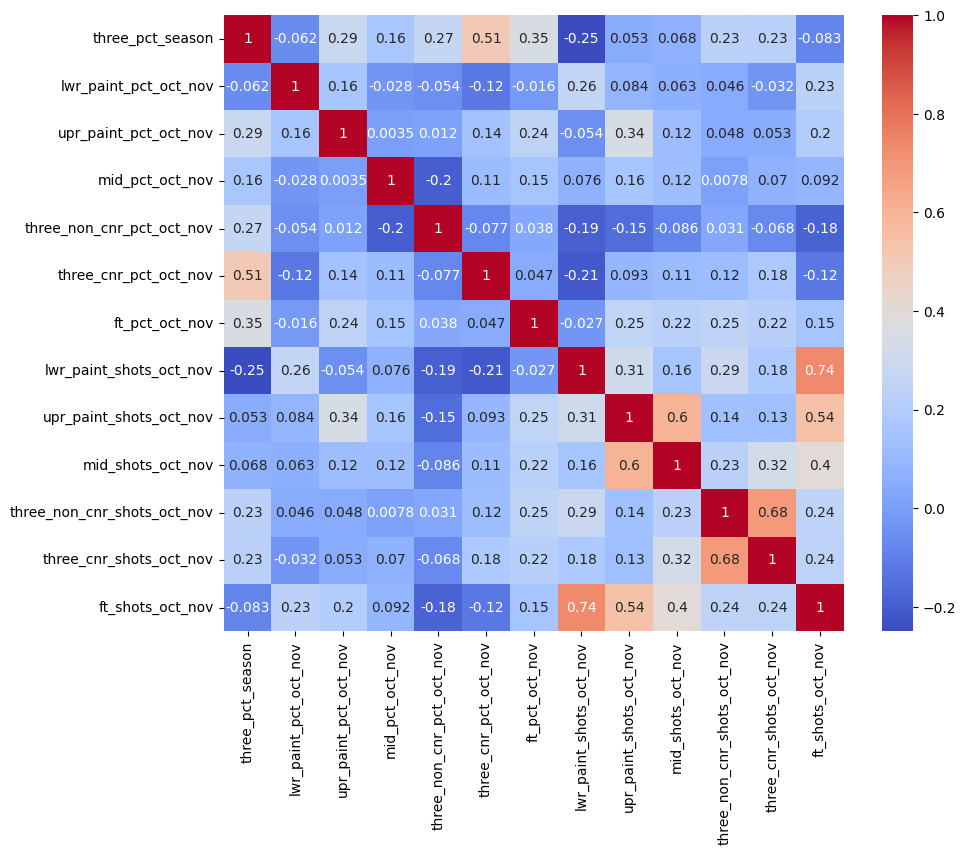

In [127]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", annot_kws={"size": 10})

plt.show()


                            OLS Regression Results                            
Dep. Variable:       three_pct_season   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     6.986
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           2.97e-08
Time:                        03:49:51   Log-Likelihood:                 188.52
No. Observations:                  86   AIC:                            -351.0
Df Residuals:                      73   BIC:                            -319.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

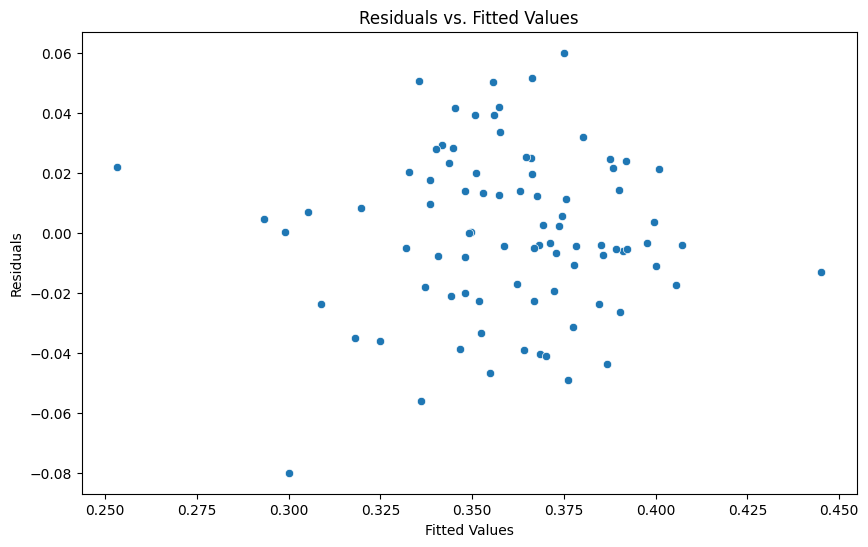

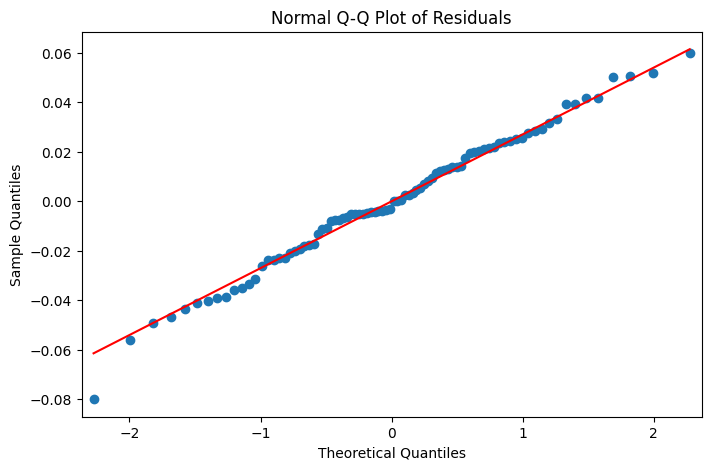


Mean Squared Error on Test Set: 0.000890692792711876
R-squared on Test Set: 0.39912674971210704

Predicted 3-Point Percentages:
Malcolm Brogdon: 0.42853843799831787
Tyrese Maxey: 0.37499431617188345
Stephen Curry: 0.4451746795891606
Kentavious Caldwell-Pope: 0.4008159301800107
Jevon Carter: 0.38621260624703774


In [128]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(url)

X = df.drop(['Name', 'three_pct_season'], axis=1)
y = df['three_pct_season']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

print(model.summary())

# Check for multicollinearity using the variance inflation factor (VIF)
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Calculate tolerance
vif_data["Tolerance"] = 1 / vif_data["VIF"]

print("\nVIF and Tolerance:")
print(vif_data)

# Check for heteroscedasticity by plotting residuals vs. predicted values
residuals = model.resid
fitted_values = model.fittedvalues
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

# Check for normality of residuals using a Q-Q plot
fig, ax = plt.subplots(figsize=(8, 5))
sm.qqplot(residuals, line='s', ax=ax)
ax.set_title("Normal Q-Q Plot of Residuals")
plt.show()

X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'\nMean Squared Error on Test Set: {mse}')
print(f'R-squared on Test Set: {r_squared}')

new_data_example = X.iloc[:5, :]
new_data_example = sm.add_constant(new_data_example)  # Add a constant term for intercept in the new data
predicted_percentages = model.predict(new_data_example)

print("\nPredicted 3-Point Percentages:")
for i, percentage in enumerate(predicted_percentages):
    print(f"{df['Name'].iloc[i]}: {percentage}")


In [129]:
df = pd.read_csv(url)

X = df.drop(['Name', 'three_pct_season'], axis=1)

X = sm.add_constant(X)

all_predictions = model.predict(X)

df['Predicted_3Point_Pct'] = all_predictions

df['Difference'] = df['Predicted_3Point_Pct'] - df['three_pct_season']

print("\nPredicted 3-Point Percentages and Differences:")
print(df[['Name', 'three_pct_season', 'Predicted_3Point_Pct', 'Difference']])

average_difference = df['Difference'].mean()
print(f"\nAverage Difference: {average_difference}")



Predicted 3-Point Percentages and Differences:
                         Name  three_pct_season  Predicted_3Point_Pct  \
0             Malcolm Brogdon             0.437              0.428538   
1                Tyrese Maxey             0.435              0.374994   
2               Stephen Curry             0.432              0.445175   
3    Kentavious Caldwell-Pope             0.422              0.400816   
4                Jevon Carter             0.421              0.386213   
..                        ...               ...                   ...   
103            Scottie Barnes             0.283              0.318055   
104             Killian Hayes             0.280              0.336068   
105     Giannis Antetokounmpo             0.275              0.253179   
106                   Bol Bol             0.268              0.367786   
107          Dennis Smith Jr.             0.220              0.299993   

     Difference  
0     -0.008462  
1     -0.060006  
2      0.013175  
3  

In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

df = pd.read_csv(url)

X = df.drop(['Name', 'three_pct_season'], axis=1)
y = df['three_pct_season']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

# Display feature importance
feature_importance = model.feature_importances_
print("\nFeature Importance:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")

# Predicting three-point percentage for the first 5 rows in the dataset
new_data_example = X.iloc[:5, :]
predicted_percentages = model.predict(new_data_example)

# Display the predicted percentages
print("\nPredicted 3-Point Percentages:")
for i, percentage in enumerate(predicted_percentages):
    print(f"{df['Name'].iloc[i]}: {percentage}")


Mean Squared Error on Test Set: 0.001131480681818183

Feature Importance:
lwr_paint_pct_oct_nov: 0.04928649168981512
upr_paint_pct_oct_nov: 0.07473964641423902
mid_pct_oct_nov: 0.024191778934714202
three_non_cnr_pct_oct_nov: 0.19740645575423232
three_cnr_pct_oct_nov: 0.24714614733327844
ft_pct_oct_nov: 0.16200389449906025
lwr_paint_shots_oct_nov: 0.041347904880122355
upr_paint_shots_oct_nov: 0.02989654169500543
mid_shots_oct_nov: 0.026925157432820486
three_non_cnr_shots_oct_nov: 0.05510089205633771
three_cnr_shots_oct_nov: 0.04701614142362483
ft_shots_oct_nov: 0.04493894788674978

Predicted 3-Point Percentages:
Malcolm Brogdon: 0.3866399999999997
Tyrese Maxey: 0.41653000000000007
Stephen Curry: 0.41411999999999977
Kentavious Caldwell-Pope: 0.40673999999999977
Jevon Carter: 0.36782999999999993


In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

df = pd.read_csv(url)

X = df.drop(['Name', 'three_pct_season'], axis=1)
y = df['three_pct_season']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

# Calculate permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

# Display feature importance
print("\nPermutation Importance:")
for feature, importance in zip(X.columns, perm_importance.importances_mean):
    print(f"{feature}: {importance}")

new_data_example = X.iloc[:5, :]
predicted_percentages = model.predict(new_data_example)

print("\nPredicted 3-Point Percentages:")
for i, percentage in enumerate(predicted_percentages):
    print(f"{df['Name'].iloc[i]}: {percentage}")


Mean Squared Error on Test Set: 0.002413954545454545

Permutation Importance:
lwr_paint_pct_oct_nov: -0.2174881896202467
upr_paint_pct_oct_nov: 0.019845898239314857
mid_pct_oct_nov: 0.004097765041275955
three_non_cnr_pct_oct_nov: -0.24516573558873495
three_cnr_pct_oct_nov: 0.19205117769278518
ft_pct_oct_nov: 0.04373436588203366
lwr_paint_shots_oct_nov: 0.03831599409759783
upr_paint_shots_oct_nov: -0.06873798983805582
mid_shots_oct_nov: 0.039995372486925966
three_non_cnr_shots_oct_nov: 0.05088424526934366
three_cnr_shots_oct_nov: 0.004476979516285414
ft_shots_oct_nov: -0.0628739643848752

Predicted 3-Point Percentages:
Malcolm Brogdon: 0.354
Tyrese Maxey: 0.435
Stephen Curry: 0.432
Kentavious Caldwell-Pope: 0.422
Jevon Carter: 0.412


In [132]:
correlation_matrix = df2.drop(columns=['three_pct_season', 'Name']).corr()

# Calculate eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

# Create a DataFrame with eigenvalues and corresponding variable names
eigenvalue_data = pd.DataFrame({
    'Variable': correlation_matrix.columns,
    'Eigenvalue': eigenvalues
})

# Sort the DataFrame by eigenvalues in descending order
eigenvalue_data = eigenvalue_data.sort_values(by='Eigenvalue', ascending=False)

# Print the DataFrame
print(eigenvalue_data)

                       Variable  Eigenvalue
0         lwr_paint_pct_oct_nov    3.031536
1         upr_paint_pct_oct_nov    1.677327
2               mid_pct_oct_nov    1.408926
3     three_non_cnr_pct_oct_nov    1.225932
10      three_cnr_shots_oct_nov    0.963000
11             ft_shots_oct_nov    0.922457
9   three_non_cnr_shots_oct_nov    0.743548
8             mid_shots_oct_nov    0.693377
7       upr_paint_shots_oct_nov    0.564952
6       lwr_paint_shots_oct_nov    0.338291
5                ft_pct_oct_nov    0.255894
4         three_cnr_pct_oct_nov    0.174761
